In [74]:
%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


In [80]:
import gwsurrogate
%matplotlib notebook
from ipywidgets import *
import numpy as np
import matplotlib.pyplot as plt

# Choose a surrogate model to work

In [81]:
gwsurrogate.catalog.list()

EOBNRv2
SpEC_q1_10_NoSpin
SpEC_q1_10_NoSpin_linear
SpEC_q1_10_NoSpin_linear_alt
NRSur4d2s_TDROM_grid12
NRSur4d2s_FDROM_grid12
NRHybSur3dq8
NRHybSur2dq15
NRSur7dq4
NRHybSur3dq8Tidal
EMRISur1dq1e4
BHPTNRSur1dq1e4


In [82]:
sur   = gwsurrogate.LoadSurrogate('NRSur7dq4')
#help(sur)

Loaded NRSur7dq4 model


# Setup limits for the Surrogate model parameters

In [84]:
f_low    = 0

Lmin     = 2
Lmax     = 4

q_min    = 1.
q_max    = 6.

ChiA_min = -1.
ChiA_max =  1.
ChiB_min = -1.
ChiB_max =  1.

max_Chi_mag = 0.9 * sur.hard_param_lims[1]


# Play with Gravitational Wave Strain

<IPython.core.display.Javascript object>


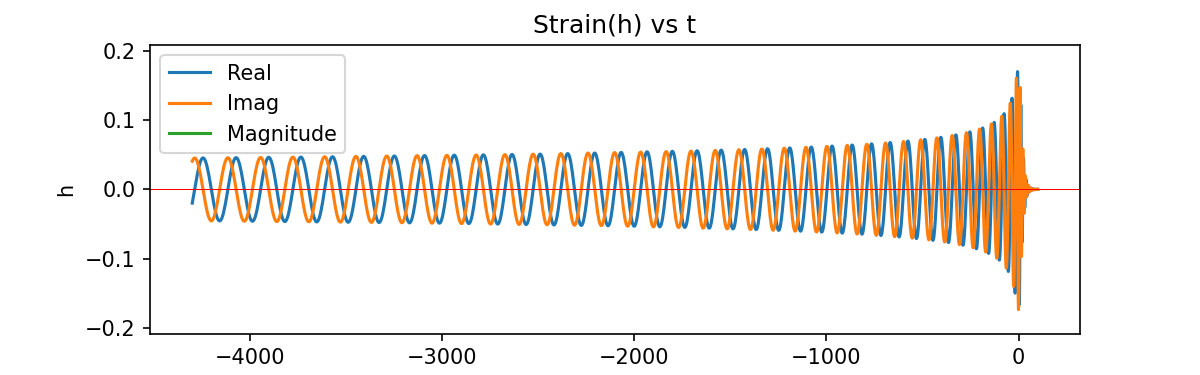

In [90]:
# Start with so random initial values of BBH parameters to generate a GW _______________

q     = 1.
ChiA  = np.array([0., 0., 0.])
ChiB  = np.array([0., 0., 0.])
f_low = 0
f_ref = 0
inclination = 0 # Inclination angle between the orbital angular momentum direction at the reference epoch and the line-of-sight to the observer.
phi_ref     = 0
t, h, dyn = sur(q, ChiA, ChiB,f_low=f_low,f_ref=f_ref,inclination=inclination,phi_ref=phi_ref)

fig = plt.figure(figsize=(8,2.5))
ax  = fig.add_subplot(1,1,1)
line, = ax.plot (t, np.real(h),label='Real')
line2,= ax.plot (t, np.imag(h),label='Imag')
line3,= ax.plot (t, np.abs(h),label='Magnitude')
ax.set_title('h vs t')
plt.legend(loc='upper left')
#plt.tight_layout()

# ______________________________________________________________________________________


##### Extrinsic parameters
inclination_min = 0.
inclination_max = 180.
inclination_step = 1      # In degrees   #(inclination_max-inclination_min)/200.
inclination_slider = FloatSlider(min=inclination_min, max=inclination_max, step=inclination_step, value=0., description="Inclination", layout=widgets.Layout(width='50%'), style= {'handle_color':'purple'})

phi_ref_min = 0.
phi_ref_max = 360.
phi_ref_step = 1          # In degrees   #(phi_ref_max-phi_ref_min)/200.
phi_ref_slider = FloatSlider(min=phi_ref_min, max=phi_ref_max, step=phi_ref_step, value=0., description="phi_ref", layout=widgets.Layout(width='50%'), style= {'handle_color':'purple'})

# ______________________________________________________________________________________


# Reference frequency at Epoch
f_ref_min = 0.015         # Not sure how to fix lower limit. check: ~/anaconda3/envs/new_scri/lib/python3.10/site-packages/gwsurrogate/new/precessing_surrogate.py:351
f_ref_max = .201/np.pi    # because in sur_code, in dimentionless units omega_ref = f_ref * np.pi < .201
f_ref_step = (f_ref_max-f_ref_min)/100.
f_ref_slider = FloatSlider(min=f_ref_min, max=f_ref_max, step=f_ref_step, value=f_ref_min, description="f_ref", layout=widgets.Layout(width='50%'), style= {'handle_color':'purple'})

# ______________________________________________________________________________________


# Mass ratio
q_widget = FloatSlider(min=q_min, max=q_max, step=0.05, value=(q_min+q_max)/2.,
                       description='Mass Ratio', layout=widgets.Layout(width='50%'), style= {'handle_color':'green'})

# ______________________________________________________________________________________
axis_fixed_button = Checkbox(False, description="Fix the Axes?", style= {'description_width':'50','background':'lightpink'} )

# ______________________________________________________________________________________
only_mag_button  = Checkbox(False, description="Show magnitude?", style= {'description_width':'50','background':'lightpink'} )
real_part_button = Checkbox(True, description="h_plus", style= {'description_width':'50','background':'lightpink'} )
imag_part_button = Checkbox(True, description="h_cross", style= {'description_width':'50','background':'lightpink'} )


# Spin Parameters of BHA
ChiA_x_widget = FloatSlider(min=ChiA_min, max=ChiA_max, step=0.05, value=0.,description=r"For BHA: $\chi_{x}$", style= {'handle_color':'orange'})
ChiA_y_widget = FloatSlider(min=ChiA_min, max=ChiA_max, step=0.05, value=0.,description=r"For BHA: $\chi_{y}$", style= {'handle_color':'orange'})
ChiA_z_widget = FloatSlider(min=ChiA_min, max=ChiA_max, step=0.05, value=0.,description=r"For BHA: $\chi_{z}$", style= {'handle_color':'orange'})

def spin_magA(ChiA_x,ChiA_y,ChiA_z):
    return np.sqrt(ChiA_x**2.+ChiA_y**2.+ChiA_z**2.)

# This automatically adjusts the limits of sliders such that
# the total magnitude of ChiA remains in allowed limits _________________________________
def handle_slider_change(change):
    ChiA_x_widget.max = np.sqrt(np.abs(max_Chi_mag**2.- ChiA_y_widget.value**2. - ChiA_z_widget.value**2.))
    ChiA_x_widget.min = -1. * np.abs(ChiA_x_widget.max)
    ChiA_y_widget.max = np.sqrt(np.abs(max_Chi_mag**2.- ChiA_x_widget.value**2. - ChiA_z_widget.value**2.))#np.sqrt(max_mag**2.- x_widget.value**2.)
    ChiA_y_widget.min = -1. * np.abs(ChiA_y_widget.max)
    ChiA_z_widget.max = np.sqrt(np.abs(max_Chi_mag**2.- ChiA_x_widget.value**2. - ChiA_y_widget.value**2.))#np.sqrt(max_mag**2.- x_widget.value**2.- y_widget.value**2.)
    ChiA_z_widget.min = -1. * np.abs(ChiA_z_widget.max)
    mag_widget_A.value = spin_magA(ChiA_x_widget.value,ChiA_y_widget.value,ChiA_z_widget.value)
    
ChiA_x_widget.observe(handle_slider_change, 'value')
ChiA_y_widget.observe(handle_slider_change, 'value')
ChiA_z_widget.observe(handle_slider_change, 'value')

# Slider to keep a check on allowed magnitude of ChiA
mag_widget_A = FloatSlider(min=0.0, max=max_Chi_mag, step=0.05, value=0., style= {'handle_color':'red'},description=r"$|\chi_{A}|$ bounds")

# ______________________________________________________________________________________



# Make the sliders for Spin Parameters of BHB __________________________________________

ChiB_x_widget = FloatSlider(min=ChiB_min, max=ChiB_max, step=0.05, value=0.,description=r"For BHB: $\chi_{x}$", style= {'handle_color':'orange'})
ChiB_y_widget = FloatSlider(min=ChiB_min, max=ChiB_max, step=0.05, value=0.,description=r"For BHB: $\chi_{y}$", style= {'handle_color':'orange'})
ChiB_z_widget = FloatSlider(min=ChiB_min, max=ChiB_max, step=0.05, value=0.,description=r"For BHB: $\chi_{z}$", style= {'handle_color':'orange'})

def spin_magB(ChiB_x,ChiB_y,ChiB_z):
    return np.sqrt(ChiB_x**2.+ChiB_y**2.+ChiB_z**2.)

# This automatically adjusts the limits of sliders such that
# the total magnitude of ChiB remains in allowed limits _________________________________
def handle_slider_change(change):
    ChiB_x_widget.max = np.sqrt(np.abs(max_Chi_mag**2.- ChiB_y_widget.value**2. - ChiB_z_widget.value**2.))
    ChiB_x_widget.min = -1. * np.abs(ChiB_x_widget.max)
    ChiB_y_widget.max = np.sqrt(np.abs(max_Chi_mag**2.- ChiB_x_widget.value**2. - ChiB_z_widget.value**2.))#np.sqrt(max_mag**2.- x_widget.value**2.)
    ChiB_y_widget.min = -1. * np.abs(ChiB_y_widget.max)
    ChiB_z_widget.max = np.sqrt(np.abs(max_Chi_mag**2.- ChiB_x_widget.value**2. - ChiB_y_widget.value**2.))#np.sqrt(max_mag**2.- x_widget.value**2.- y_widget.value**2.)
    ChiB_z_widget.min = -1. * np.abs(ChiB_z_widget.max)
    mag_widget_B.value = spin_magB(ChiB_x_widget.value,ChiB_y_widget.value,ChiB_z_widget.value)
    
ChiB_x_widget.observe(handle_slider_change, 'value')
ChiB_y_widget.observe(handle_slider_change, 'value')
ChiB_z_widget.observe(handle_slider_change, 'value')

# Slider to keep a check on allowed magnitude of ChiB____________________________________
mag_widget_B = FloatSlider(min=0.0, max=max_Chi_mag, step=0.05, value=0., style= {'handle_color':'red'},description=r"$|\chi_{B}|$ bounds")

# ______________________________________________________________________________________



# This updates the plot of GW with new parameters selected using the sliders ___________

def update(keep_axis_fixed=axis_fixed_button,only_show_mag = only_mag_button,
           only_real_part = real_part_button ,only_imag_part = imag_part_button,
           q=q_widget, f_ref=f_ref_slider,
           inclination = inclination_slider,phi_ref=phi_ref_slider, 
           ChiA_x = ChiA_x_widget,ChiA_y=ChiA_y_widget,ChiA_z=ChiA_z_widget,ChiA_Limits=mag_widget_A, 
           ChiB_x = ChiB_x_widget,ChiB_y=ChiB_y_widget,ChiB_z=ChiB_z_widget,ChiB_Limits=mag_widget_B):
   
    ChiA = np.array([ChiA_x_widget.value,ChiA_y_widget.value,ChiA_z_widget.value])
    ChiB = np.array([ChiB_x_widget.value,ChiB_y_widget.value,ChiB_z_widget.value])
    
    inclination = inclination*np.pi/180
    phi_ref = phi_ref*np.pi/180

    t, h, dyn = sur(q, ChiA, ChiB,f_low=f_low,f_ref=f_ref,inclination=inclination,phi_ref=phi_ref)
    
    if only_show_mag:
        line3.set_ydata(abs(h))
        line3.set_xdata(t)
    else:
        line3.set_ydata(None)
        line3.set_xdata(t)
        
        
    if only_real_part:
        line.set_ydata(np.real(h))
        line.set_xdata(t)
    else:
        line.set_ydata(None)
        line.set_xdata(t)
        
    if only_imag_part:
        line2.set_ydata(np.imag(h))
        line2.set_xdata(t)
    else:
        line2.set_ydata(None)
        line2.set_xdata(t)
    
    if not keep_axis_fixed: ax.set_ylim([-np.max(np.abs(h))*1.2,np.max(np.abs(h))*1.2])
    ax.set_title('Strain(h) vs t')
    plt.xlabel('Time')
    plt.ylabel('h')
    plt.axhline(y = 0., color = 'r', linestyle = '-', linewidth=.5)
    plt.legend(loc='upper left')
    fig.canvas.draw_idle()

widget = interactive(update);

control_checkboxes = HBox(widget.children[0:4])
control_ext_param = HBox(widget.children[5:8])
control_q    = HBox(widget.children[4:5], layout = Layout( width='100%')) #q
control_ChiA = VBox(widget.children[8:12], layout = Layout( width='35%'))
control_ChiB = VBox(widget.children[12:], layout = Layout( width='35%'))


#display(widget.children[0:2])
display(control_checkboxes)
display(control_ext_param)
display(control_q)
display(HBox([control_ChiA,control_ChiB]))
# ______________________________________________________________________________________

# Play with individual modes $h_{lm}$

- $h(\theta,\phi) = \sum\limits_{l=1}^{\infty} \sum\limits_{m=-l}^{l} h_{lm}(t)  \sideset{_{-2}}{} Y_{lm}(\theta,\phi) $

- Here $\sideset{_{-2}}{} Y_{lm}(\theta,\phi) $ are the spin =−2 weighted spherical harmonics
- $\theta$ and $\phi$ are the polar and azimuthal angles on the sky in the source frame.

<IPython.core.display.Javascript object>


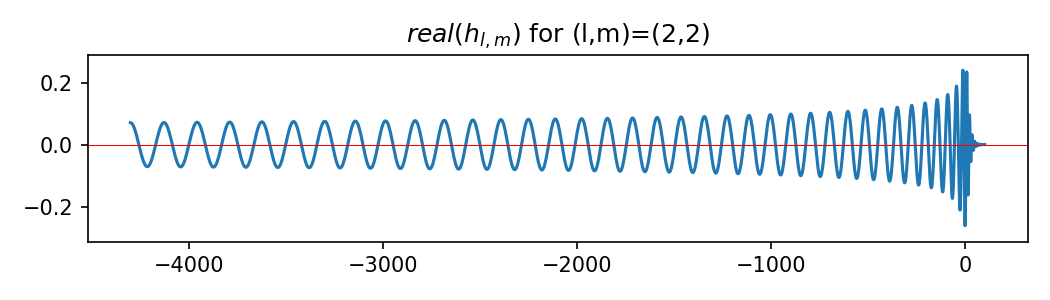

In [86]:
# Start with so random initial values of BBH parameters to generate a GW _______________

q     = 1.
ChiA  = np.array([0.1, 0.1, 0.])
ChiB  = np.array([0. , 0. , 0.])
l,m   = 2,2

t, h, dyn = sur(q, ChiA, ChiB,f_low=f_low)

fig = plt.figure(figsize=(7,2))
ax  = fig.add_subplot(1,1,1)
line, = ax.plot (t, np.real(h[(l,m)]))
ax.set_title(r'$real(h_{l,m})$' +' for (l,m)=({0},{1})'.format(l,m))
plt.tight_layout()

# ______________________________________________________________________________________



# Make the slider for mass ratio _______________________________________________________

q_widget = FloatSlider(min=q_min, max=q_max, step=0.05, value=(q_min+q_max)/2., layout=widgets.Layout(width='50%'), style= {'handle_color':'green'})

# ______________________________________________________________________________________
axis_fixed_button = Checkbox(False, description="Fix the Axes?", style= {'description_width':'50','background':'lightpink'} )
l_slider = IntSlider(min=Lmin, max=Lmax, steps=1, value=l, style= {'handle_color':'blue'})
m_slider = IntSlider(min=-l  , max=l   , steps=1, value=m, style= {'handle_color':'blue'})

def m_range(change):
    m_slider.min = -int(l_slider.value)
    m_slider.max = int(l_slider.value)
l_slider.observe(m_range,'value')

# Make the sliders for Spin Parameters of BHA __________________________________________

ChiA_x_widget = FloatSlider(min=ChiA_min, max=ChiA_max, step=0.05, value=0.,description=r"For BHA: $\chi_{x}$", style= {'handle_color':'orange'})
ChiA_y_widget = FloatSlider(min=ChiA_min, max=ChiA_max, step=0.05, value=0.,description=r"For BHA: $\chi_{y}$", style= {'handle_color':'orange'})
ChiA_z_widget = FloatSlider(min=ChiA_min, max=ChiA_max, step=0.05, value=0.,description=r"For BHA: $\chi_{z}$", style= {'handle_color':'orange'})

def spin_magA(ChiA_x,ChiA_y,ChiA_z):
    return np.sqrt(ChiA_x**2.+ChiA_y**2.+ChiA_z**2.)

# This automatically adjusts the limits of sliders such that
# the total magnitude of ChiA remains in allowed limits _________________________________
def handle_slider_change(change):
    ChiA_x_widget.max = np.sqrt(np.abs(max_Chi_mag**2.- ChiA_y_widget.value**2. - ChiA_z_widget.value**2.))
    ChiA_x_widget.min = -1. * np.abs(ChiA_x_widget.max)
    ChiA_y_widget.max = np.sqrt(np.abs(max_Chi_mag**2.- ChiA_x_widget.value**2. - ChiA_z_widget.value**2.))#np.sqrt(max_mag**2.- x_widget.value**2.)
    ChiA_y_widget.min = -1. * np.abs(ChiA_y_widget.max)
    ChiA_z_widget.max = np.sqrt(np.abs(max_Chi_mag**2.- ChiA_x_widget.value**2. - ChiA_y_widget.value**2.))#np.sqrt(max_mag**2.- x_widget.value**2.- y_widget.value**2.)
    ChiA_z_widget.min = -1. * np.abs(ChiA_z_widget.max)
    mag_widget_A.value = spin_magA(ChiA_x_widget.value,ChiA_y_widget.value,ChiA_z_widget.value)
    
ChiA_x_widget.observe(handle_slider_change, 'value')
ChiA_y_widget.observe(handle_slider_change, 'value')
ChiA_z_widget.observe(handle_slider_change, 'value')

# Slider to keep a check on allowed magnitude of ChiA
mag_widget_A = FloatSlider(min=0.0, max=max_Chi_mag, step=0.05, value=0., style= {'handle_color':'red'},description=r"$|\chi_{A}|$ bounds")

# ______________________________________________________________________________________



# Make the sliders for Spin Parameters of BHB __________________________________________

ChiB_x_widget = FloatSlider(min=ChiB_min, max=ChiB_max, step=0.05, value=0.,description=r"For BHB: $\chi_{x}$", style= {'handle_color':'orange'})
ChiB_y_widget = FloatSlider(min=ChiB_min, max=ChiB_max, step=0.05, value=0.,description=r"For BHB: $\chi_{y}$", style= {'handle_color':'orange'})
ChiB_z_widget = FloatSlider(min=ChiB_min, max=ChiB_max, step=0.05, value=0.,description=r"For BHB: $\chi_{z}$", style= {'handle_color':'orange'})

def spin_magB(ChiB_x,ChiB_y,ChiB_z):
    return np.sqrt(ChiB_x**2.+ChiB_y**2.+ChiB_z**2.)

# This automatically adjusts the limits of sliders such that
# the total magnitude of ChiB remains in allowed limits _________________________________
def handle_slider_change(change):
    ChiB_x_widget.max = np.sqrt(np.abs(max_Chi_mag**2.- ChiB_y_widget.value**2. - ChiB_z_widget.value**2.))
    ChiB_x_widget.min = -1. * np.abs(ChiB_x_widget.max)
    ChiB_y_widget.max = np.sqrt(np.abs(max_Chi_mag**2.- ChiB_x_widget.value**2. - ChiB_z_widget.value**2.))#np.sqrt(max_mag**2.- x_widget.value**2.)
    ChiB_y_widget.min = -1. * np.abs(ChiB_y_widget.max)
    ChiB_z_widget.max = np.sqrt(np.abs(max_Chi_mag**2.- ChiB_x_widget.value**2. - ChiB_y_widget.value**2.))#np.sqrt(max_mag**2.- x_widget.value**2.- y_widget.value**2.)
    ChiB_z_widget.min = -1. * np.abs(ChiB_z_widget.max)
    mag_widget_B.value = spin_magB(ChiB_x_widget.value,ChiB_y_widget.value,ChiB_z_widget.value)
    
ChiB_x_widget.observe(handle_slider_change, 'value')
ChiB_y_widget.observe(handle_slider_change, 'value')
ChiB_z_widget.observe(handle_slider_change, 'value')

# Slider to keep a check on allowed magnitude of ChiB____________________________________
mag_widget_B = FloatSlider(min=0.0, max=max_Chi_mag, step=0.05, value=0., style= {'handle_color':'red'},description=r"$|\chi_{B}|$ bounds")

# ______________________________________________________________________________________


# This updates the plot of GW with new parameters selected using the sliders ___________

def update(keep_axis_fixed=axis_fixed_button,l=l_slider,m=m_slider,q=q_widget,ChiA_x = ChiA_x_widget,ChiA_y=ChiA_y_widget,ChiA_z=ChiA_z_widget,ChiA_Limits=mag_widget_A, ChiB_x = ChiB_x_widget,ChiB_y=ChiB_y_widget,ChiB_z=ChiB_z_widget,ChiB_Limits=mag_widget_B):
   
    ChiA = np.array([ChiA_x_widget.value,ChiA_y_widget.value,ChiA_z_widget.value])
    ChiB = np.array([ChiB_x_widget.value,ChiB_y_widget.value,ChiB_z_widget.value])
    
    t, h, dyn = sur(q, ChiA, ChiB,f_low=f_low)
    
    line.set_ydata(np.real(h[(l,m)]))
    line.set_xdata(t)
    if not keep_axis_fixed: ax.set_ylim([np.min(np.real(h[(l,m)]))*1.2,np.max(np.real(h[(l,m)]))*1.2])
    ax.set_title(r'$real(h_{l,m})$' +' for (l,m)=({0},{1})'.format(l,m))
    plt.axhline(y = 0., color = 'r', linestyle = '-', linewidth=.5)
    fig.canvas.draw_idle()

widget = interactive(update);

#control_axis = HBox(widget.children[0])
control_lm   = VBox(widget.children[:3]) #l,m
control_q    = HBox(widget.children[3:4]) #q
control_ChiA = VBox(widget.children[4:8], layout = Layout( width='35%'))
control_ChiB = VBox(widget.children[8:], layout = Layout( width='35%'))


#display(widget.children[0])
display(HBox([control_lm]))
display(control_q)
#display(control1)
display(HBox([control_ChiA,control_ChiB]))

# ______________________________________________________________________________________

# Play a video for changing parameters

<IPython.core.display.Javascript object>


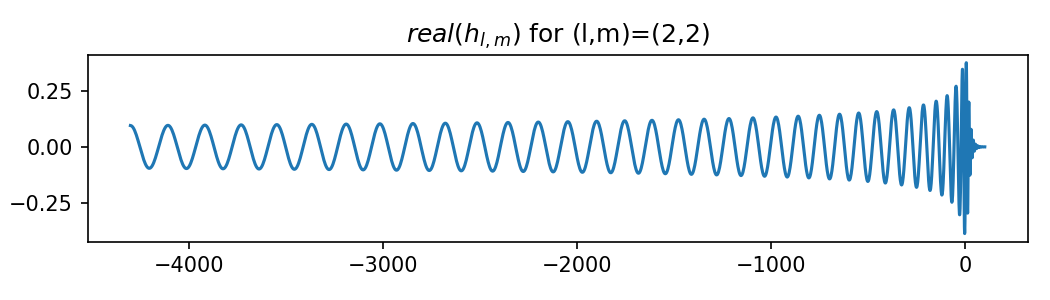

In [35]:
Q     = 1.
ChiA  = np.array([0.1, 0.1, 0.])
ChiB  = np.array([0. , 0. , 0.])
l,m   = 2,2

t, h, dyn = sur(Q, ChiA, ChiB,f_low=f_low)

fig = plt.figure(figsize=(7,2))
ax  = fig.add_subplot(1,1,1)
line, = ax.plot (t, np.real(h[(l,m)]))
ax.set_title(r'$real(h_{l,m})$' +' for (l,m)=({0},{1})'.format(l,m))
plt.tight_layout()


Q_min = 1.*100.
Q_max = 6.*100.


#Slider for mass ratio for BHA and BHB

Q_widget = FloatSlider(min=Q_min, max=Q_max, step=1, value=(Q_min+Q_max)/2., layout=widgets.Layout(width='50%'), style= {'handle_color':'green'},description='100 x q')
#display(HBox([Label('Select Mass Ratio: '), Q_widget]))
# ===========================================================================================================

play_Q = widgets.Play(
    value=(Q_min+Q_max)/2.,
    min=Q_min,
    max=Q_max,
    step=1,
    interval=10,
    description="Press play",
    disabled=False,
    continuous_update=True
)

widgets.jslink((play_Q, 'value'), (Q_widget, 'value'))

# Sliders for Spin Parameters of BHA

ChiA_x_widget = FloatSlider(min=ChiA_min, max=ChiA_max, step=0.05, value=0.)
ChiA_y_widget = FloatSlider(min=ChiA_min, max=ChiA_max, step=0.05, value=0.)
ChiA_z_widget = FloatSlider(min=ChiA_min, max=ChiA_max, step=0.05, value=0.)


def spin_magA(ChiA_x,ChiA_y,ChiA_z):
    return np.sqrt(ChiA_x**2.+ChiA_y**2.+ChiA_z**2.)

def handle_slider_change(change):
    ChiA_x_widget.max = np.sqrt(max_Chi_mag**2.- ChiA_y_widget.value**2. - ChiA_z_widget.value**2.)
    ChiA_y_widget.max = np.sqrt(max_Chi_mag**2.- ChiA_x_widget.value**2. - ChiA_z_widget.value**2.)#np.sqrt(max_mag**2.- x_widget.value**2.)
    ChiA_z_widget.max = np.sqrt(max_Chi_mag**2.- ChiA_x_widget.value**2. - ChiA_y_widget.value**2.)#np.sqrt(max_mag**2.- x_widget.value**2.- y_widget.value**2.)
    mag_widget_A.value = spin_magA(ChiA_x_widget.value,ChiA_y_widget.value,ChiA_z_widget.value)
    
ChiA_x_widget.observe(handle_slider_change, 'value')
ChiA_y_widget.observe(handle_slider_change, 'value')
ChiA_z_widget.observe(handle_slider_change, 'value')

mag_widget_A = FloatSlider(min=0.0, max=max_Chi_mag, step=0.05, value=0., style= {'handle_color':'red'})
#display(HBox([Label('Total BHA Spin Magnitude:'), mag_widget_A]))
# ===========================================================================================================


# Sliders for Spin Parameters of BHB

ChiB_x_widget = FloatSlider(min=ChiB_min, max=ChiB_max, step=0.05, value=0.)
ChiB_y_widget = FloatSlider(min=ChiB_min, max=ChiB_max, step=0.05, value=0.)
ChiB_z_widget = FloatSlider(min=ChiB_min, max=ChiB_max, step=0.05, value=0.)

def spin_magB(ChiB_x,ChiB_y,ChiB_z):
    return np.sqrt(ChiB_x**2.+ChiB_y**2.+ChiB_z**2.)

def handle_slider_change(change):
    ChiB_x_widget.max = np.sqrt(max_Chi_mag**2.- ChiB_y_widget.value**2. - ChiB_z_widget.value**2.)
    ChiB_y_widget.max = np.sqrt(max_Chi_mag**2.- ChiB_x_widget.value**2. - ChiB_z_widget.value**2.)#np.sqrt(max_mag**2.- x_widget.value**2.)
    ChiB_z_widget.max = np.sqrt(max_Chi_mag**2.- ChiB_x_widget.value**2. - ChiB_y_widget.value**2.)#np.sqrt(max_mag**2.- x_widget.value**2.- y_widget.value**2.)
    mag_widget_B.value = spin_magB(ChiB_x_widget.value,ChiB_y_widget.value,ChiB_z_widget.value)
    
ChiB_x_widget.observe(handle_slider_change, 'value')
ChiB_y_widget.observe(handle_slider_change, 'value')
ChiB_z_widget.observe(handle_slider_change, 'value')

mag_widget_B = FloatSlider(min=0.0, max=max_Chi_mag, step=0.05, value=0., style= {'handle_color':'red'})
#display(HBox([Label('Total BHB Spin Magnitude:'), mag_widget_B]))
# ===========================================================================================================


def update(Q=Q_widget,ChiA_x = ChiA_x_widget,ChiA_y=ChiA_y_widget,ChiA_z=ChiA_z_widget,ChiA_Limit=mag_widget_A, ChiB_x = ChiB_x_widget,ChiB_y=ChiB_y_widget,ChiB_z=ChiB_z_widget,ChiB_Limit=mag_widget_B):#,BX=ChiB_x_widget,BY=ChiB_y_widget,BZ=ChiB_z_widget):
   
    ChiA = np.array([ChiA_x_widget.value,ChiA_y_widget.value,ChiA_z_widget.value])
    ChiB = np.array([ChiB_x_widget.value,ChiB_y_widget.value,ChiB_z_widget.value])
    
    t, h, dyn = sur(Q/100., ChiA, ChiB,f_low=f_low)
    
    line.set_ydata(np.real(h[(l,m)]))
    line.set_xdata(t)
    
    fig.canvas.draw_idle()

#interact(update)

widget = interactive(update);
display(widgets.HBox([play_Q, Q_widget]))

#control2 = VBox(widget.children[1:5], layout = Layout( width='35%'))
#control3 = VBox(widget.children[5:], layout = Layout( width='35%'))
#display(HBox([control2,control3]))

# Things to do 


- Export it to a binder package
- Make it into a website
- Add a function such that sub-plots for (l,m) will be automatically be made
- See what we can learn from the output of these videos, i.e., how h_lm change for different parameters
- vectorize the spins instead of three different functions
- Check inclination and phi_ref angles, make a diagram showing them
- Add scales of x-axis, y-axis

<IPython.core.display.Javascript object>


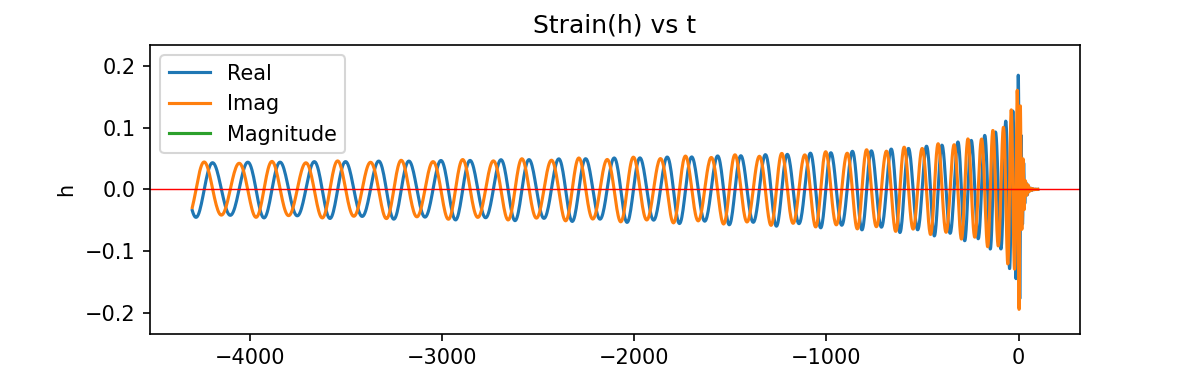

In [87]:
# Start with so random initial values of BBH parameters to generate a GW _______________

q     = 1.
ChiA  = np.array([0., 0., 0.])
ChiB  = np.array([0., 0., 0.])
f_low = 0
f_ref = 0
inclination = 0 # Inclination angle between the orbital angular momentum direction at the reference epoch and the line-of-sight to the observer.
phi_ref     = 0
t, h, dyn = sur(q, ChiA, ChiB,f_low=f_low,f_ref=f_ref,inclination=inclination,phi_ref=phi_ref)

fig = plt.figure(figsize=(8,2.5))
ax  = fig.add_subplot(1,1,1)
line, = ax.plot (t, np.real(h),label='Real')
line2,= ax.plot (t, np.imag(h),label='Imag')
line3,= ax.plot (t, np.abs(h),label='Magnitude')
ax.set_title('h vs t')
plt.legend(loc='upper left')
#plt.tight_layout()

# ______________________________________________________________________________________


##### Extrinsic parameters
inclination_min = 0.
inclination_max = 180.
inclination_step = 1      # In degrees   #(inclination_max-inclination_min)/200.
inclination_slider = FloatSlider(min=inclination_min, max=inclination_max, step=inclination_step, value=0., description="Inclination", layout=widgets.Layout(width='50%'), style= {'handle_color':'purple'})

phi_ref_min = 0.
phi_ref_max = 360.
phi_ref_step = 1          # In degrees   #(phi_ref_max-phi_ref_min)/200.
phi_ref_slider = FloatSlider(min=phi_ref_min, max=phi_ref_max, step=phi_ref_step, value=0., description="phi_ref", layout=widgets.Layout(width='50%'), style= {'handle_color':'purple'})

# ______________________________________________________________________________________


# Reference frequency at Epoch
f_ref_min = 0.015         # Not sure how to fix lower limit. check: ~/anaconda3/envs/new_scri/lib/python3.10/site-packages/gwsurrogate/new/precessing_surrogate.py:351
f_ref_max = .201/np.pi    # because in sur_code, in dimentionless units omega_ref = f_ref * np.pi < .201
f_ref_step = (f_ref_max-f_ref_min)/100.
f_ref_slider = FloatSlider(min=f_ref_min, max=f_ref_max, step=f_ref_step, value=f_ref_min, description="f_ref", layout=widgets.Layout(width='50%'), style= {'handle_color':'purple'})

# ______________________________________________________________________________________


# Mass ratio
q_widget = FloatSlider(min=q_min, max=q_max, step=0.05, value=(q_min+q_max)/2.,
                       description='Mass Ratio', layout=widgets.Layout(width='50%'), style= {'handle_color':'green'})

# ______________________________________________________________________________________
axis_fixed_button = Checkbox(False, description="Fix the Axes?", style= {'description_width':'50','background':'lightpink'} )

# ______________________________________________________________________________________
only_mag_button  = Checkbox(False, description="Show magnitude?", style= {'description_width':'50','background':'lightpink'} )
real_part_button = Checkbox(True, description="h_plus", style= {'description_width':'50','background':'lightpink'} )
imag_part_button = Checkbox(True, description="h_cross", style= {'description_width':'50','background':'lightpink'} )


# Spin Parameters of BHA
ChiA_x_widget = FloatSlider(min=ChiA_min, max=ChiA_max, step=0.05, value=0.,description=r"For BHA: $\chi_{x}$", style= {'handle_color':'orange'})
ChiA_y_widget = FloatSlider(min=ChiA_min, max=ChiA_max, step=0.05, value=0.,description=r"For BHA: $\chi_{y}$", style= {'handle_color':'orange'})
ChiA_z_widget = FloatSlider(min=ChiA_min, max=ChiA_max, step=0.05, value=0.,description=r"For BHA: $\chi_{z}$", style= {'handle_color':'orange'})

def spin_magA(ChiA_x,ChiA_y,ChiA_z):
    return np.sqrt(ChiA_x**2.+ChiA_y**2.+ChiA_z**2.)

# This automatically adjusts the limits of sliders such that
# the total magnitude of ChiA remains in allowed limits _________________________________
def handle_slider_change(change):
    ChiA_x_widget.max = np.sqrt(np.abs(max_Chi_mag**2.- ChiA_y_widget.value**2. - ChiA_z_widget.value**2.))
    ChiA_x_widget.min = -1. * np.abs(ChiA_x_widget.max)
    ChiA_y_widget.max = np.sqrt(np.abs(max_Chi_mag**2.- ChiA_x_widget.value**2. - ChiA_z_widget.value**2.))#np.sqrt(max_mag**2.- x_widget.value**2.)
    ChiA_y_widget.min = -1. * np.abs(ChiA_y_widget.max)
    ChiA_z_widget.max = np.sqrt(np.abs(max_Chi_mag**2.- ChiA_x_widget.value**2. - ChiA_y_widget.value**2.))#np.sqrt(max_mag**2.- x_widget.value**2.- y_widget.value**2.)
    ChiA_z_widget.min = -1. * np.abs(ChiA_z_widget.max)
    mag_widget_A.value = spin_magA(ChiA_x_widget.value,ChiA_y_widget.value,ChiA_z_widget.value)
    
ChiA_x_widget.observe(handle_slider_change, 'value')
ChiA_y_widget.observe(handle_slider_change, 'value')
ChiA_z_widget.observe(handle_slider_change, 'value')

# Slider to keep a check on allowed magnitude of ChiA
mag_widget_A = FloatSlider(min=0.0, max=max_Chi_mag, step=0.05, value=0., style= {'handle_color':'red'},description=r"$|\chi_{A}|$ bounds")

# ______________________________________________________________________________________



# Make the sliders for Spin Parameters of BHB __________________________________________

ChiB_x_widget = FloatSlider(min=ChiB_min, max=ChiB_max, step=0.05, value=0.,description=r"For BHB: $\chi_{x}$", style= {'handle_color':'orange'})
ChiB_y_widget = FloatSlider(min=ChiB_min, max=ChiB_max, step=0.05, value=0.,description=r"For BHB: $\chi_{y}$", style= {'handle_color':'orange'})
ChiB_z_widget = FloatSlider(min=ChiB_min, max=ChiB_max, step=0.05, value=0.,description=r"For BHB: $\chi_{z}$", style= {'handle_color':'orange'})

def spin_magB(ChiB_x,ChiB_y,ChiB_z):
    return np.sqrt(ChiB_x**2.+ChiB_y**2.+ChiB_z**2.)

# This automatically adjusts the limits of sliders such that
# the total magnitude of ChiB remains in allowed limits _________________________________
def handle_slider_change(change):
    ChiB_x_widget.max = np.sqrt(np.abs(max_Chi_mag**2.- ChiB_y_widget.value**2. - ChiB_z_widget.value**2.))
    ChiB_x_widget.min = -1. * np.abs(ChiB_x_widget.max)
    ChiB_y_widget.max = np.sqrt(np.abs(max_Chi_mag**2.- ChiB_x_widget.value**2. - ChiB_z_widget.value**2.))#np.sqrt(max_mag**2.- x_widget.value**2.)
    ChiB_y_widget.min = -1. * np.abs(ChiB_y_widget.max)
    ChiB_z_widget.max = np.sqrt(np.abs(max_Chi_mag**2.- ChiB_x_widget.value**2. - ChiB_y_widget.value**2.))#np.sqrt(max_mag**2.- x_widget.value**2.- y_widget.value**2.)
    ChiB_z_widget.min = -1. * np.abs(ChiB_z_widget.max)
    mag_widget_B.value = spin_magB(ChiB_x_widget.value,ChiB_y_widget.value,ChiB_z_widget.value)
    
ChiB_x_widget.observe(handle_slider_change, 'value')
ChiB_y_widget.observe(handle_slider_change, 'value')
ChiB_z_widget.observe(handle_slider_change, 'value')

# Slider to keep a check on allowed magnitude of ChiB____________________________________
mag_widget_B = FloatSlider(min=0.0, max=max_Chi_mag, step=0.05, value=0., style= {'handle_color':'red'},description=r"$|\chi_{B}|$ bounds")

# ______________________________________________________________________________________



# This updates the plot of GW with new parameters selected using the sliders ___________

def update(keep_axis_fixed=axis_fixed_button,only_show_mag = only_mag_button,
           only_real_part = real_part_button ,only_imag_part = imag_part_button,
           q=q_widget, f_ref=f_ref_slider,
           inclination = inclination_slider,phi_ref=phi_ref_slider, 
           ChiA_x = ChiA_x_widget,ChiA_y=ChiA_y_widget,ChiA_z=ChiA_z_widget,ChiA_Limits=mag_widget_A, 
           ChiB_x = ChiB_x_widget,ChiB_y=ChiB_y_widget,ChiB_z=ChiB_z_widget,ChiB_Limits=mag_widget_B):
   
    ChiA = np.array([ChiA_x_widget.value,ChiA_y_widget.value,ChiA_z_widget.value])
    ChiB = np.array([ChiB_x_widget.value,ChiB_y_widget.value,ChiB_z_widget.value])
    
    inclination = inclination*np.pi/180
    phi_ref = phi_ref*np.pi/180

    t, h, dyn = sur(q, ChiA, ChiB,f_low=f_low,f_ref=f_ref,inclination=inclination,phi_ref=phi_ref)
    
    if only_show_mag:
        line3.set_ydata(abs(h))
        line3.set_xdata(t)
    else:
        line3.set_ydata(None)
        line3.set_xdata(t)
        
        
    if only_real_part:
        line.set_ydata(np.real(h))
        line.set_xdata(t)
    else:
        line.set_ydata(None)
        line.set_xdata(t)
        
    if only_imag_part:
        line2.set_ydata(np.imag(h))
        line2.set_xdata(t)
    else:
        line2.set_ydata(None)
        line2.set_xdata(t)
    
    if not keep_axis_fixed: ax.set_ylim([-np.max(np.abs(h))*1.2,np.max(np.abs(h))*1.2])
    ax.set_title('Strain(h) vs t')
    plt.xlabel('Time')
    plt.ylabel('h')
    plt.axhline(y = 0., color = 'r', linestyle = '-', linewidth=.5)
    plt.legend(loc='upper left')
    fig.canvas.draw_idle()

widget = interactive(update);

control_checkboxes = HBox(widget.children[0:4])
control_ext_param = HBox(widget.children[5:8])
control_q    = HBox(widget.children[4:5], layout = Layout( width='100%')) #q
control_ChiA = VBox(widget.children[8:12], layout = Layout( width='35%'))
control_ChiB = VBox(widget.children[12:], layout = Layout( width='35%'))


#display(widget.children[0:2])
display(control_checkboxes)
display(control_ext_param)
display(control_q)
display(HBox([control_ChiA,control_ChiB]))
# ______________________________________________________________________________________